In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = mnist.load_data()

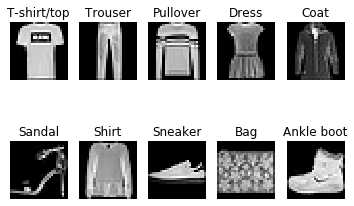

In [35]:
plt.figure()

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train_full[y_train_full.tolist().index(i)], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.savefig('labels.eps')

In [4]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_valid = X_valid[..., np.newaxis]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [74]:
from functools import partial

conv_layer = partial(tf.keras.layers.Conv2D, padding='valid', activation='tanh')
dense_layer = partial(tf.keras.layers.Dense, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    conv_layer(6, 5, strides=(2,2), padding='same', input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2),
    conv_layer(16, 5, strides=(2,2)),
    tf.keras.layers.AveragePooling2D(2),
    conv_layer(120, 5, strides=(2,2)),
    tf.keras.layers.Flatten(),
    dense_layer(84),
    dense_layer(42),
    dense_layer(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

ValueError: Negative dimension size caused by subtracting 5 from 1 for 'conv2d_53/Conv2D' (op: 'Conv2D') with input shapes: [?,1,1,16], [5,5,16,120].

In [75]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [76]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.5430 - accuracy: 0.8458 - val_loss: 0.5117 - val_accuracy: 0.8522
Epoch 2/5
55000/55000 [==============================] - 43s 779us/sample - loss: 0.5083 - accuracy: 0.8537 - val_loss: 0.4806 - val_accuracy: 0.8600
Epoch 3/5
55000/55000 [==============================] - 43s 777us/sample - loss: 0.4839 - accuracy: 0.8609 - val_loss: 0.4715 - val_accuracy: 0.8634
Epoch 4/5
55000/55000 [==============================] - 43s 776us/sample - loss: 0.4667 - accuracy: 0.8655 - val_loss: 0.4599 - val_accuracy: 0.8662
Epoch 5/5
55000/55000 [==============================] - 42s 760us/sample - loss: 0.4533 - accuracy: 0.8695 - val_loss: 0.4464 - val_accuracy: 0.8734


In [79]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]]


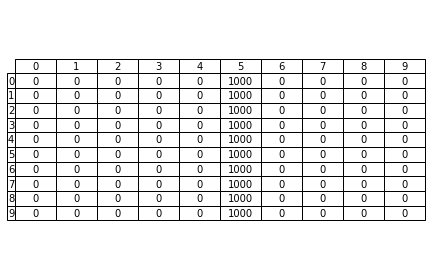

In [78]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('convnn_conf_mat.eps')